In [3]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings('ignore')

### 1번 - 정규분포 확률 구하기 (231P)

#### 대한민국 남성의 20~30대 키를 측정한 결과, 평균 175cm 표준편차 5cm 이다. <br> 나의 키가 180cm일 경우에 나는 몇 % 범위에 위치할까요?

In [3]:
# 정규분포
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x,mu,sigma)
print('나의 키가 {0}일 경우에 나는 몇 % 범위에 위치할까요: {1:.1f}%'.format(x,(1-prob)*100))

나의 키가 180일 경우에 나는 몇 % 범위에 위치할까요: 15.9%


#### 어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차 3km인 정규분포를 이룬다. (233P)

##### 1) 1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가요? <br> 2) 1리터를 가지고 15km 이상을 달릴 확률은 얼마인가요?

In [4]:
mu = 12
sigma = 3
x1 = 9
x2 = 15
prob1 = stats.norm.cdf(x1,mu,sigma)
prob2 = stats.norm.cdf(x2,mu,sigma)
print('1리터를 가지고 {0}km 이상 {1}km 이하를 달릴 확률은 얼마인가요?: {2:.3f}'.format(x1,x2,(prob2-prob1)))

1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가요?: 0.683


In [5]:
# 2번 문제
print('1리터를 가지고 {0}km 이상을 달릴 확률은 얼마인가요?: {1:.3f}'.format(x2,(1-prob2)))

1리터를 가지고 15km 이상을 달릴 확률은 얼마인가요?: 0.159


### 2번 카이제곱 분포 (322P)

#### 노트북 컴퓨터의 6가지 제품(A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복 선택할 수 있도록 32명의 소비자를 대상으로 설문조사한 table이다. <br> 각 제품에 대해 이미지에 대한 차이가 있겠는가? (유의수준 0.05)

In [7]:
df = pd.DataFrame({'A': [18, 1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4],
                  'C': [4, 1, 3, 4, 9, 5, 4], 'D': [4, 1, 2, 3, 2, 7, 3],
                  'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})

# chi - x축 값
# pval - pvalue
# dof - 자유도 {(행-1)*(열-1)}
# expected - 기댓값


chi, pval, dof, expected = stats.chi2_contingency(df)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))

chi-square test
chisq: 98.274
p-value: 0.000
degree pf freedom: 30
expected value: 
[[11.   8.2  5.2  3.8  1.9  9.8]
 [ 8.5  6.4  4.1  3.   1.5  7.6]
 [10.5  7.8  5.   3.7  1.8  9.3]
 [ 8.3  6.2  3.9  2.9  1.4  7.3]
 [ 8.   6.   3.8  2.8  1.4  7.1]
 [ 8.8  6.6  4.2  3.1  1.5  7.8]
 [ 8.   6.   3.8  2.8  1.4  7.1]]


### 이항분포 (255P)

#### 도장공정에서 광택도 불량이 30%나 된다고 함 <br> 5대의 차량을 임의로 선택했을 때 불량대수가 각각 0, 1, 2, 3, 4, 5 대가 나올 확률은 얼마인가요?

In [8]:
n = 5 
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print('P(X={0}) = {1:.3f}'.format(i,prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


### 평균 검정하는 것

#### 1-sample t-test (301P)

고객서비스센터의 고객만족도 평균은 78.0이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다. 개선활동이 만족도를 변화시켰는가? (유의수준 0.05)

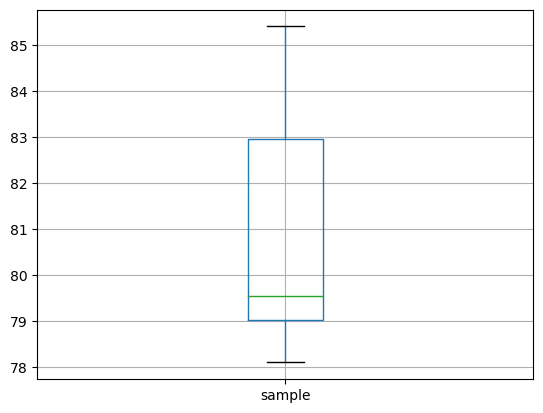

In [26]:
df = pd.DataFrame({'sample':[85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
df.boxplot(['sample'])
plt.show()

In [27]:
t_result = stats.ttest_1samp(df, 78.0)
t, p = t_result.statistic.round(3), \
    t_result.pvalue.round(3)

In [28]:
print('1-Sample t-test')
print('t 통계량 : {}'.format(t))
print('p-value : {}'.format(p))
print('평균 : ', np.mean(df))

1-Sample t-test
t 통계량 : [3.379]
p-value : [0.008]
평균 :  sample    80.93
dtype: float64


#### 2-sample t-test (303p)

제품을 A공급자와 B공급자로 부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다. 공급자간에 모평균에 차이가 있다고 할 수 있는가? (유의수준 0.05)

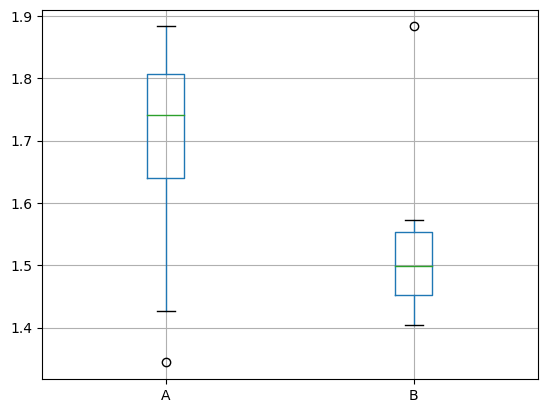

In [20]:
df = pd.DataFrame({'A' : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                 'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})
df.boxplot(['A','B'])
plt.show()

In [21]:
# A 정규성 검정 
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={},". format(statistic, p))

statistic=0.8425754904747009, p-value=0.08004532009363174,


In [22]:
# B 정규성 검정
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={},". format(statistic, p))

statistic=0.7734811902046204, p-value=0.014793740585446358,


In [23]:
# 등분산성 검정
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

In [24]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'],df['B'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [25]:
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:1.7
p:0.111


### 상관관계 분석 (334p)

#### 초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요.

In [19]:
# 초코칩의 강도
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
# 재료 반죽온도
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval = stats.pearsonr(df1, df2)

print('Correlation Analysis')
print('corr:{0:0.3f}'.format(corr))  # 상관계수
print('p-value:{0:0.3f}'.format(pval)) # p-value

Correlation Analysis
corr:-0.723
p-value:0.000


-----------------------------------

## 2주차 시험

In [7]:
# 데이터 불러오기
dt_jp = pd.read_csv('/home/piai/바탕화면/1차시험_주관식 데이터셋/전표처리시간.csv', encoding='euc-kr')
dt_jp.head()

,A 부서,B 부서,C 부서,D 부서
0,25,31,19,18
1,30,30,21,25
2,20,34,27,16
3,23,30,25,19
4,27,28,25,20


In [10]:
mean = dt_jp.mean().mean()
mean

25.450000000000003

In [13]:
std = np.std(dt_jp)
std

A 부서    3.898718
B 부서    1.486607
C 부서    3.469870
D 부서    3.008322
dtype: float64

In [14]:
data = np.array([
    [25, 31, 19, 18],
    [30, 30, 21, 25],
    [20, 34, 27, 16],
    [23, 30, 25, 19],
    [27, 28, 25, 20]
])

std_dev = np.std(data)
print(std_dev)

4.89157438868101


In [15]:
# 정규분포
mu = mean
sigma = std_dev
x = 35
prob = stats.norm.cdf(x,mu,sigma)
print('나의 키가 {0}일 경우에 나는 몇 % 범위에 위치할까요: {1:.1f}%'.format(x,(1-prob)*100))

나의 키가 35일 경우에 나는 몇 % 범위에 위치할까요: 2.5%


#### 문제 2번


In [16]:
df = pd.DataFrame({'A': [182, 154], 'B': [213, 138], 'C': [203, 110]})

# chi - x축 값
# pval - pvalue
# dof - 자유도 {(행-1)*(열-1)}
# expected - 기댓값


chi, pval, dof, expected = stats.chi2_contingency(df)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))

chi-square test
chisq: 7.878
p-value: 0.019
degree pf freedom: 2
expected value: 
[[200.9 209.9 187.2]
 [135.1 141.1 125.8]]


In [17]:
df

,A,B,C
0,182,213,203
1,154,138,110


### 문제 3번

In [28]:
n = 5 
for i in range(n+1):
#     cdf = stats.binom.cdf(k=i, n=n, p=0.05)
#     print('P(X={0}) = {1:.3f}'.format(i,cdf))
    prob = stats.binom.pmf(k=i, n=n, p=0.05)
    print('P(X={0}) = {1:.3f}'.format(i,prob))

P(X=0) = 0.774
P(X=1) = 0.204
P(X=2) = 0.021
P(X=3) = 0.001
P(X=4) = 0.000
P(X=5) = 0.000


### 문제 4번

In [37]:
df = pd.DataFrame({'A' : [68.7,71.4,69.8,75.3,71.3,72.7,66.9,70.2,74.4,70.1]} )
# df.boxplot(['A','B'])
# plt.show()

In [38]:
# A 정규성 검정 
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={},". format(statistic, p))

statistic=0.9729753732681274, p-value=0.9169775247573853,


In [41]:
dfb = pd.DataFrame({ 'B' : [73.4,77,73.7,73.3,73.1,74.5,77.5,76.4,75.7]})



In [42]:
# B 정규성 검정
statistic, p = stats.shapiro(dfb['B'])
print("statistic={}, p-value={},". format(statistic, p))

statistic=0.8836878538131714, p-value=0.171633780002594,


### 5qjs


In [43]:
# 초코칩의 강도
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
# 재료 반죽온도
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval = stats.pearsonr(df1, df2)

print('Correlation Analysis')
print('corr:{0:0.3f}'.format(corr))  # 상관계수
print('p-value:{0:0.3f}'.format(pval)) # p-value

Correlation Analysis
corr:-0.723
p-value:0.000
